In [1]:
import seaborn as sns
import pandas as df

In [5]:
data = [0.6028107868886684, 0.5750939187344105, 0.5864392739740425]
names = ["Control-CA", "Control-CB", "COIN (α = 0.5)"]

In [6]:
df = pd.DataFrame({"Mo"})

NameError: name 'pd' is not defined

In [11]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 6.75, 5.25

[Text(0, 0.5, 'Unweighted Accuracy')]

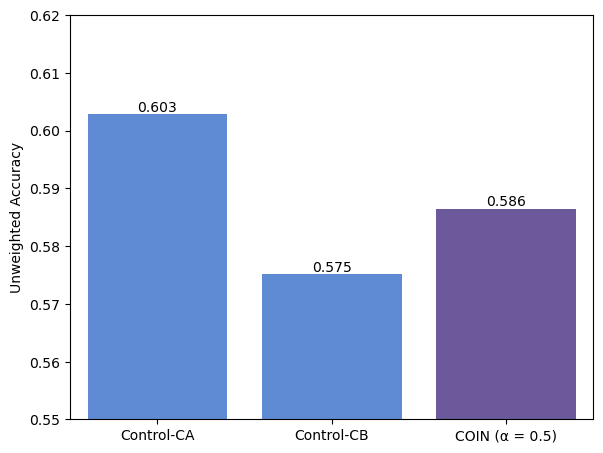

In [12]:
import matplotlib.pyplot as plt

plt.ylim(0.55, 0.62)
ax = sns.barplot(y=data, x=names, palette=[(74/255, 134/255, 232/255), (74/255, 134/255, 232/255), (103/255, 78/255, 167/255)])
ax.bar_label(ax.containers[0], fontsize=10, fmt="{:.3f}")
ax.set(ylabel='Unweighted Accuracy')

In [189]:
import pandas as pd
import numpy as np

In [190]:
df = pd.read_csv("model2/model/data.csv")

/tmp/ipykernel_693021/744795870.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("model2/model/data.csv")


In [191]:
df = df.groupby("conversation").filter(lambda x: x["text"].count() >= 5)


In [192]:
(df.loc[:, "0":"10"] > 0).sum(0)

0      76719
1     131410
2      75728
3      11340
4     148657
5      28022
6     129268
7      18241
8      60108
9       8213
10      5078
dtype: int64

In [179]:
ldf = df.groupby("conversation").tail(-4)
ldf.loc[:, "0":"10"] = ldf.loc[:, "0":"10"] > 0
# ldf.loc[:, "0":"10"] = 1/(1+np.exp(-ldf.loc[:, "0":"10"])) >= 0.5

/tmp/ipykernel_693021/2111111791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldf.loc[:, "0":"10"] = ldf.loc[:, "0":"10"] > 0


In [180]:
cdf = ldf.groupby("source").sum(1)
cdf.loc["total"] = cdf.sum()

In [181]:
cdf

,0,1,2,3,4,5,6,7,8,9,10
source,,,,,,,,,,,
Bolt,29082,63566,28380,3835,97227,20106,73315,6172,28615,3881,1611
Cornell,19838,22012,19956,2949,13167,2178,19479,5270,10958,1319,1626
IEMOCAP,2655,2889,2768,308,2495,551,3243,968,2125,203,231
total,51575,88467,51104,7092,112889,22835,96037,12410,41698,5403,3468


<Axes: >

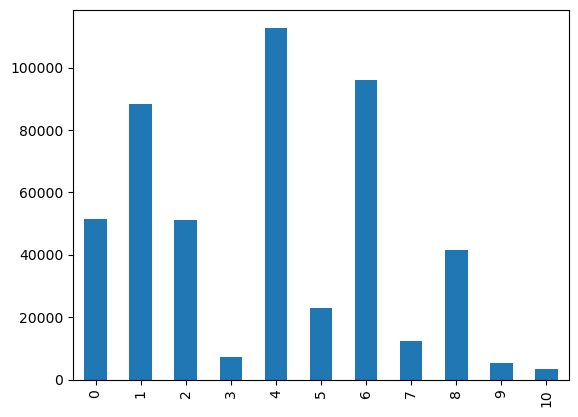

In [73]:
cdf.iloc[3].plot.bar()

In [78]:
xdf = df
xdf.loc[:, "0":"10"] = xdf.loc[:, "0":"10"] >= 0

In [90]:
xdf[xdf["10"]]["text"].values.tolist()
# label_names = ["anger", "anticipation", "disgust", "fear", "joy", "love", "optimism", "hopeless", "sadness", "surprise", "trust"]


['Tell what you see. Write it well, Sir, and make sure you get it right',
 "Oh, Frederick... you're not only a great doctor, you're a great... you're almost a...",
 "We all have our feelings.  I know that I have mine.  And... I wouldn't want to hurt yours.",
 "You've got to help me to remain faithful.",
 "Yes, don't worry.",
 'You got a great set-up here Yorgi. You really know how to live.',
 "It's a beautiful town, Prague. It's been good to me.",
 "That's alright, I'll figure something out.",
 "Of course. I'll do what I can. I have to go, before they notice.",
 "Yes, I do. You're right. I can't just let him go free. Besides, I can help you from the inside.",
 'Alright, Cage, you\'ve got me. This is one of those moments. "Many are called, few are chosen", that kind of thing. Your government needs you. Are you up for the challenge?',
 "You're perceptive too. I forgot to add that to the list of surprises. I'm with the National Security Agency. And unlikely as it may sound, I need your he

In [13]:
text = df['text'].values

In [14]:
words = [i.split() for i in text]

In [15]:
lens = [len(i) for i in words]

In [17]:
sum(lens) / len(lens)

12.840175074867542

In [2]:
import numpy as np

In [3]:
data = np.concatenate([[x-1] * x * x * x * 1000 for x in range(1, 6)])

In [4]:
data

array([0, 0, 0, ..., 4, 4, 4])

In [5]:
counts = np.bincount(data)
t = counts.size
print(counts)

[  1000   8000  27000  64000 125000]


In [6]:
import sys
eps = sys.float_info.epsilon
num_samples = 5000

p = 1 / np.maximum(counts[data]-num_samples/counts[data], eps)
p /= p.sum()

In [7]:
avg = np.zeros_like(counts)
for i in range(500): avg += np.bincount(np.random.choice(data, num_samples, replace=False, p=p))
avg / 500

array([ 672.198, 1036.18 , 1087.742, 1098.2  , 1105.68 ])

In [91]:
data = np.zeros((200000, 5))

In [92]:
for i, x in enumerate([50000, 40000, 20000, 10000, 5000]):
    data[np.random.choice(200000, x, replace=False), i] = 1
    

In [93]:
len(data[data.sum(1) != 0])

100006

In [94]:
data = data[data.sum(1) != 0][:100000]

In [1]:
from spanemo.data_loader import alternate_preprocessor

In [2]:
alternate_preprocessor()("specialmasktoken")

/home/alexlu/miniconda3/envs/emo/lib/python3.9/site-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading english - 1grams ...
Reading english - 2grams ...


/home/alexlu/miniconda3/envs/emo/lib/python3.9/site-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading english - 1grams ...


['[MASK]']

In [95]:
counts = data.sum(0)
t = counts.shape[-1]
print(counts)

[49998. 39997. 19998.  9999.  5000.]


In [97]:
data.shape

(100000, 5)

In [ ]:
np.maximum

In [164]:
num_samples = 25000

p = (data * 1/np.maximum(counts-num_samples/5, eps)).sum(1)
# p = (data * 1/counts).sum(1)
# p = (data * 1/counts); p[p==0] = -np.inf; p = p.max(1)
p /= p.sum()

In [160]:
data[data[:, 0] == 1].sum(0)

array([49998.,  9990.,  4994.,  2472.,  1244.])

In [165]:
avg = np.zeros_like(counts)
for i in range(500): 
    indices = np.random.choice(len(data), num_samples, replace=False, p=p)
    avg += data[indices].sum(0)
avg / 500

array([9980.198, 9000.284, 6934.342, 5752.784, 4526.112])

In [1]:
d = {a: a*2 for a in range(10)}

In [9]:
a

NameError: name 'a' is not defined

In [3]:
set(d)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [127]:
import pandas as pd

In [128]:
df = pd.DataFrame({"t": [0] * 20 + [1] * 10, "x": range(30)})

In [143]:
abc = df["t"] == True

In [155]:
(abc == 0) | (abc == 1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
Name: t, dtype: bool

In [138]:
df[df.groupby("t").tail(-5).index]

KeyError: "None of [Int64Index([5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 25, 26, 27,\n            28, 29],\n           dtype='int64')] are in the [columns]"

In [18]:
max(lens)

33

In [2]:
>>> from transformers import BertTokenizer
>>> tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

>>> sequence_a = "This is a short sequence."
>>> sequence_b = "This is a rather long sequence. It is at least longer than the sequence A."

>>> encoded_sequence_a = tokenizer(sequence_a)["input_ids"]
>>> encoded_sequence_b = tokenizer(sequence_b)["input_ids"]


In [5]:
tokenizer.decode(2208)

'c o m p e t i t i o n'

In [8]:
tokenizer.apply_chat_template()

AttributeError: 'BertTokenizer' object has no attribute 'apply_chat_template'

In [6]:
import pandas as pd

In [12]:
x = pd.Series(['a ' * 6, 'b ' * 7])

In [26]:
x.str.split(n=6).str[:6].str.join(" ")

0    a a a a a a
1    b b b b b b
dtype: object

In [1]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("facebook/blenderbot-400M-distill")


In [6]:
tokenizer.chat_template = "{% if not add_generation_prompt is defined %}{% set add_generation_prompt = false %}{% endif %}{% for message in messages %}{{'<|im_start|>' + message['role'] + '\n' + message['content'] + '<|im_end|>' + '\n'}}{% endfor %}{% if add_generation_prompt %}{{ '<|im_start|>assistant\n' }}{% endif %}"


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("model2/cornell_movie/utterances.csv")

In [20]:
df[:].groupby('conversation_id').tail(-5).groupby

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors
117,NaN,That's not,u5,NaN,L909,m0,"[{'rt': 1, 'toks': [{'tok': 'That', 'tag': 'DT...",[]
131,NaN,In 9th. For a month,u5,L894,L893,m0,"[{'rt': 0, 'toks': [{'tok': 'In', 'tag': 'IN',...",[]
132,NaN,What?,u0,L893,L893,m0,"[{'rt': 0, 'toks': [{'tok': 'What', 'tag': 'WP...",[]
133,NaN,"Joey never told you we went out, did he?",u5,NaN,L893,m0,"[{'rt': 8, 'toks': [{'tok': 'Joey', 'tag': 'NN...",[]
168,NaN,The prom? Kat has a date?,u11,L878,L878,m0,"[{'rt': 1, 'toks': [{'tok': 'The', 'tag': 'DT'...",[]
...,...,...,...,...,...,...,...,...
304660,NaN,"Indeedldid, MyLord. Itwas one ofthe first to c...",u9032,L666390,L666388,m616,"[{'rt': 0, 'toks': [{'tok': 'Indeedldid', 'tag...",[]
304661,NaN,1 saw you lead our Cavalry sir,u9027,L666389,L666388,m616,"[{'rt': 1, 'toks': [{'tok': '1', 'tag': 'CD', ...",[]
304662,NaN,"Excuse me, My Lord. Norris-Newman, of ""The St...",u9032,L666388,L666388,m616,"[{'rt': 0, 'toks': [{'tok': 'Excuse', 'tag': '...",[]
304663,NaN,"An historical moment, Gentlemen.",u9027,NaN,L666388,m616,"[{'rt': 2, 'toks': [{'tok': 'An', 'tag': 'DT',...",[]


In [6]:
list(df['text'].values).index("And I don't need to know. So fuck you, I'm goin' to Hollywood.")

176572

In [7]:
df.iloc[176572-10:176572+10]

,timestamp,text,speaker,reply_to,conversation_id,meta.movie_id,meta.parsed,vectors
176562,NaN,I guess we have a deal. Nice to be working wit...,u5116,L193605,L193605,m339,"[{'rt': 1, 'toks': [{'tok': 'I', 'tag': 'PRP',...",[]
176563,NaN,Get this crap out of me.,u5120,NaN,L193605,m339,"[{'rt': 0, 'toks': [{'tok': 'Get', 'tag': 'VB'...",[]
176564,NaN,You don't understand. It's already in you.,u5116,L193598,L193596,m339,"[{'rt': 3, 'toks': [{'tok': 'You', 'tag': 'PRP...",[]
176565,NaN,Maybe. But you're not putting any shit in me t...,u5120,L193597,L193596,m339,"[{'rt': 0, 'toks': [{'tok': 'Maybe', 'tag': 'R...",[]
176566,NaN,Having second thoughts?,u5116,L193596,L193596,m339,"[{'rt': 0, 'toks': [{'tok': 'Having', 'tag': '...",[]
176567,NaN,"Wait a minute, what are you talkin' about?",u5120,NaN,L193596,m339,"[{'rt': 5, 'toks': [{'tok': 'Wait', 'tag': 'VB...",[]
176568,NaN,Tell the President to adopt. I think I'll like...,u5120,L193584,L193578,m339,"[{'rt': 0, 'toks': [{'tok': 'Tell', 'tag': 'VB...",[]
176569,NaN,That's the deal.,u5116,L193583,L193578,m339,"[{'rt': 1, 'toks': [{'tok': 'That', 'tag': 'DT...",[]
176570,NaN,"So what's the deal, huh? Go into L.A., find th...",u5120,L193582,L193578,m339,"[{'rt': 2, 'toks': [{'tok': 'So', 'tag': 'RB',...",[]
176571,NaN,"That's right, big shot. Unless you do what we ...",u5116,L193581,L193578,m339,"[{'rt': 1, 'toks': [{'tok': 'That', 'tag': 'DT...",[]


In [9]:
import torch

In [10]:
>>> padded_sequences = tokenizer([sequence_a, sequence_b], padding=True, return_tensors='pt')
>>> padded_sequences["attention_mask"].dtype == torch.long


True

In [3]:
import transformers
from transformers import AutoModel
from transformers import AutoTokenizer
import torchsummary
from torchsummary import summary


In [4]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [18]:
tokens = tokenizer("nervous")['input_ids']

In [19]:
tokenizer.convert_ids_to_tokens(tokens)

['[CLS]', 'nervous', '[SEP]']

In [11]:
roberta = AutoModel.from_pretrained("roberta-base")



Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
summary(roberta, depth=5)

Layer (type:depth-idx)                                  Param #
├─RobertaEmbeddings: 1-1                                --
|    └─Embedding: 2-1                                   38,603,520
|    └─Embedding: 2-2                                   394,752
|    └─Embedding: 2-3                                   768
|    └─LayerNorm: 2-4                                   1,536
|    └─Dropout: 2-5                                     --
├─RobertaEncoder: 1-2                                   --
|    └─ModuleList: 2-6                                  --
|    |    └─RobertaLayer: 3-1                           --
|    |    |    └─RobertaAttention: 4-1                  --
|    |    |    |    └─RobertaSelfAttention: 5-1         1,771,776
|    |    |    |    └─RobertaSelfOutput: 5-2            592,128
|    |    |    └─RobertaIntermediate: 4-2               --
|    |    |    |    └─Linear: 5-3                       2,362,368
|    |    |    |    └─GELUActivation: 5-4               --
|    |    |    

Layer (type:depth-idx)                                  Param #
├─RobertaEmbeddings: 1-1                                --
|    └─Embedding: 2-1                                   38,603,520
|    └─Embedding: 2-2                                   394,752
|    └─Embedding: 2-3                                   768
|    └─LayerNorm: 2-4                                   1,536
|    └─Dropout: 2-5                                     --
├─RobertaEncoder: 1-2                                   --
|    └─ModuleList: 2-6                                  --
|    |    └─RobertaLayer: 3-1                           --
|    |    |    └─RobertaAttention: 4-1                  --
|    |    |    |    └─RobertaSelfAttention: 5-1         1,771,776
|    |    |    |    └─RobertaSelfOutput: 5-2            592,128
|    |    |    └─RobertaIntermediate: 4-2               --
|    |    |    |    └─Linear: 5-3                       2,362,368
|    |    |    |    └─GELUActivation: 5-4               --
|    |    |    

In [13]:
from transformers import BertTokenizer, AutoTokenizer


In [14]:
tokenizer = AutoTokenizer.from_pretrained('roberta-base')


In [37]:
sentence = "hello i am alex"

In [52]:
tokenizer.encode_plus("test", "test2")

{'input_ids': [0, 21959, 2, 2, 21959, 176, 2], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}

In [53]:
tokenizer.decode(2)

'</s>'

In [39]:
tokens = tokenizer(sentence, return_tensors="pt")
print(tokens['input_ids'])

tensor([[    0, 42891,   939,   524,    10, 14726,     2]])


In [44]:
embeddings = roberta.embeddings(input_ids=tokens['input_ids'])
embeddings

tensor([[[ 0.1664, -0.0541, -0.0014,  ..., -0.0811,  0.0794,  0.0155],
         [-0.1150, -0.1756, -0.1607,  ..., -0.0596, -0.3592,  0.9941],
         [ 0.1324,  0.1079, -0.3674,  ...,  0.3495, -0.1283,  0.4034],
         ...,
         [-0.1279, -0.3089, -0.1310,  ...,  0.3103, -0.1026,  0.5261],
         [-0.3172, -0.0767,  0.2338,  ...,  0.1195,  0.4922,  0.3705],
         [ 0.2360, -0.2293, -0.0167,  ...,  0.4182,  0.1640,  0.1783]]],
       grad_fn=<NativeLayerNormBackward0>)

In [43]:
embeddings.shape

torch.Size([1, 7, 768])

In [47]:
logits = roberta.encoder(embeddings)

In [49]:
logits.last_hidden_state.shape

torch.Size([1, 7, 768])

In [ ]:
"""

original text:
hi how are you

tokenizer (tokens):
45 120 23 50

MODEL:

Embeddings:
[768] [768] [768] [768]

Encoder:




"""

In [12]:
roberta

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropou